In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

#Permite ver los graficos sin colocar plt.show
%matplotlib inline 

plt.style.use('default')
#plt.rcParams['figure.figsize'] = (15, 5)

data = pd.read_csv("properati-AR-2017-08-01-properties-sell.csv")
data.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,93.0,360.360360,1290.322581,NaN,NaN,NaN,http://www.properati.com.ar/udh_venta_casa_mer...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...
1,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,220.0,1000.000000,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/20hi_venta_casa_me...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...
2,e06d6f864a0b91346594da4d27ceddcef0947ea6,2012-11-01,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0199509,-57.5265733",...,42.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/336o_venta_departa...,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,DTO. 2 AMB. C/ VISTA PLENA AL MAR,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...
3,a07927207d2a03de5f4ba7fd76f670d6285a3315,2012-11-26,sell,house,Sierra de los Padres,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,Buenos Aires Interior,3427958.0,"-37.9511934894,-57.7752885836",...,265.0,NaN,NaN,NaN,6.0,NaN,http://www.properati.com.ar/47hc_venta_terreno...,PROPIEDAD DE CATEGORIA CUENTA CON: 4 DORMITOR...,CHALET EN VENTA,https://thumbs4.properati.com/9/DA4GMdxXrthh5z...
4,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6544492346,-58.4895603251",...,103.0,616.666667,1796.116505,NaN,5.0,NaN,http://www.properati.com.ar/4m4m_venta_casa_ma...,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA,https://thumbs4.properati.com/6/DsNJjCb5_zIPV0...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187482 entries, 0 to 187481
Data columns (total 27 columns):
id                            187482 non-null object
created_on                    187482 non-null object
operation                     187482 non-null object
property_type                 187482 non-null object
place_name                    187447 non-null object
place_with_parent_names       187482 non-null object
country_name                  187482 non-null object
state_name                    187482 non-null object
geonames_id                   158318 non-null float64
lat-lon                       118761 non-null object
lat                           118761 non-null float64
lon                           118761 non-null float64
price                         154443 non-null float64
currency                      154441 non-null object
price_aprox_local_currency    154443 non-null float64
price_aprox_usd               154443 non-null float64
surface_total_in_m2           12502

In [2]:
dataCapGba = data.loc[(data.state_name.str.contains('Buenos Aires') | data.state_name.str.contains('Capital Federal') | data.state_name.str.contains('G.B.A') ) & data.operation.str.contains('sell') , ['created_on','operation', 'property_type', 'state_name', 'place_name', 'lat', 'lon', 'price', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses', 'description']]
dataCapGba.sort_values('price_usd_per_m2', ascending = False)

,created_on,operation,property_type,state_name,place_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description
27207,2016-04-07,sell,PH,Bs.As. G.B.A. Zona Oeste,General Rodríguez,NaN,NaN,15252325.0,12.0,15.0,1.271027e+06,1.016822e+06,NaN,1.0,NaN,Popopopo - Publicado a traves de VisualGestion -
92744,2017-04-28,sell,apartment,Capital Federal,Boedo,-34.622204,-58.416089,6809000.0,33.0,33.0,2.063333e+05,2.063333e+05,NaN,1.0,NaN,Departamento 1 ambiente divisible Depto en CU...
92144,2017-04-28,sell,apartment,Capital Federal,Boedo,NaN,NaN,5214782.0,30.0,30.0,1.738261e+05,1.738261e+05,NaN,1.0,NaN,lan840- DEPTO FINANCIACION DIRECTA EN PESOSAnt...
92300,2017-04-28,sell,apartment,Capital Federal,Boedo,NaN,NaN,3657014.0,35.0,35.0,1.044861e+05,1.044861e+05,NaN,1.0,NaN,fac030- Depto anticipo en 10 meses y saldo en ...
180238,2017-07-26,sell,house,Bs.As. G.B.A. Zona Oeste,Ituzaingó,-34.657171,-58.682625,12000000.0,150.0,85.0,8.000000e+04,1.411765e+05,NaN,NaN,NaN,"CODIGO: ubicado en: MONSEÑOR TERRERO , Ituzai..."
91960,2017-04-28,sell,apartment,Capital Federal,Boedo,NaN,NaN,2356000.0,30.0,30.0,7.853333e+04,7.853333e+04,NaN,1.0,NaN,bf221- INCREIBLE FORMA DE PAGO- ANT Y CUOTAS D...
13282,2015-06-14,sell,apartment,Bs.As. G.B.A. Zona Norte,Tigre,-34.447361,-58.631426,9550360.0,137.0,137.0,6.971066e+04,6.971066e+04,NaN,3.0,NaN,"COMPRA EN AQUA RIO, EXCELENTE EMPRENDIMIENTO E..."
62480,2017-01-16,sell,apartment,Bs.As. G.B.A. Zona Norte,Olivos,NaN,NaN,7009459.0,114.0,95.0,6.148648e+04,7.378378e+04,9.0,NaN,NaN,Emprendimiento con fecha de entregar Julio del...
13283,2015-06-14,sell,apartment,Bs.As. G.B.A. Zona Norte,Tigre,-34.447361,-58.631426,3922772.0,75.0,59.0,5.230363e+04,6.648766e+04,NaN,1.0,NaN,"COMPRA EN AQUA RIO, NORDELTA, EXCELENTE EMPREN..."
8555,2015-01-30,sell,apartment,Bs.As. G.B.A. Zona Norte,Tigre,-34.447361,-58.631426,3200630.0,62.0,47.0,5.162306e+04,6.809851e+04,NaN,NaN,NaN,"Departamento en PB en esquina, en el barrio LA..."


In [3]:
dataCapGbaMenoresA10K = dataCapGba.loc[dataCapGba['price_usd_per_m2'] < 10000,:]
dataCapGbamayoresA1000 = dataCapGbaMenoresA10K.loc[dataCapGbaMenoresA10K['price_usd_per_m2'] > 1000,:]
dataCapGbamayoresA1000.sort_values('price_usd_per_m2', ascending = False)

,created_on,operation,property_type,state_name,place_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description
97079,2017-05-09,sell,house,Capital Federal,Palermo,-34.578327,-58.400505,2990000.0,300.0,380.0,9966.666667,7868.421053,NaN,NaN,NaN,"Casa en excelente estado, reciclada, gran Livi..."
92241,2017-04-28,sell,apartment,Capital Federal,Boedo,NaN,NaN,347850.0,35.0,35.0,9938.571429,9938.571429,NaN,1.0,NaN,fac025- Monoambiente en el contrafrente a part...
96840,2017-05-09,sell,apartment,Capital Federal,Puerto Madero,-34.611493,-58.360985,1600000.0,161.0,161.0,9937.888199,9937.888199,NaN,NaN,NaN,ALVEAR TOWER. Espectacular departamento en el ...
247,2013-05-24,sell,apartment,Bs.As. G.B.A. Zona Norte,Pilar,-34.452738,-58.915705,347200.0,35.0,31.0,9920.000000,11200.000000,NaN,1.0,NaN,HERMOSO MONOAMBIENTE CON BALCON AL FRENTE A ES...
121426,2017-07-04,sell,house,Bs.As. G.B.A. Zona Norte,Acassuso,-34.472209,-58.499679,9900000.0,1000.0,1000.0,9900.000000,9900.000000,NaN,NaN,NaN,Casa importante en lote privilegiado con vista...
86357,2017-04-12,sell,house,Bs.As. G.B.A. Zona Norte,Tigre,NaN,NaN,198000.0,20.0,120.0,9900.000000,1650.000000,NaN,NaN,NaN,Muy lindo triplex a estrenar de en el complejo...
91033,2017-04-28,sell,apartment,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Norte,NaN,NaN,395000.0,40.0,40.0,9875.000000,9875.000000,NaN,1.0,NaN,"Departamento Nuevo, 2 amb al frente en 1 Piso...."
54741,2016-12-01,sell,apartment,Capital Federal,Palermo Chico,-34.576562,-58.404856,2100000.0,213.0,205.0,9859.154930,10243.902439,NaN,4.0,NaN,Le Parc Figueroa Alcorta es la síntesis perfec...
106661,2017-05-31,sell,apartment,Capital Federal,Palermo,-34.577818,-58.406038,2490000.0,254.0,220.0,9803.149606,11318.181818,NaN,NaN,NaN,CODIGO: 617-1112 ubicado en: Jeronimo Salguero...
87380,2017-04-18,sell,house,Bs.As. G.B.A. Zona Oeste,Ramos Mejía,NaN,NaN,98000.0,10.0,60.0,9800.000000,1633.333333,NaN,3.0,NaN,Duplex 3 amb c/ frente con dos banos patio im...


In [5]:
dataCapGbamayoresA1000['price_usd_per_m2'].describe()

count    69985.000000
mean      2252.221703
std       1040.848913
min       1001.494214
25%       1564.090909
50%       2030.303030
75%       2637.735849
max       9966.666667
Name: price_usd_per_m2, dtype: float64

In [6]:
dataCapGba['price_usd_per_m2'].describe()

count    9.272800e+04
mean     2.035687e+03
std      4.817668e+03
min      0.000000e+00
25%      1.062500e+03
50%      1.750000e+03
75%      2.435897e+03
max      1.271027e+06
Name: price_usd_per_m2, dtype: float64

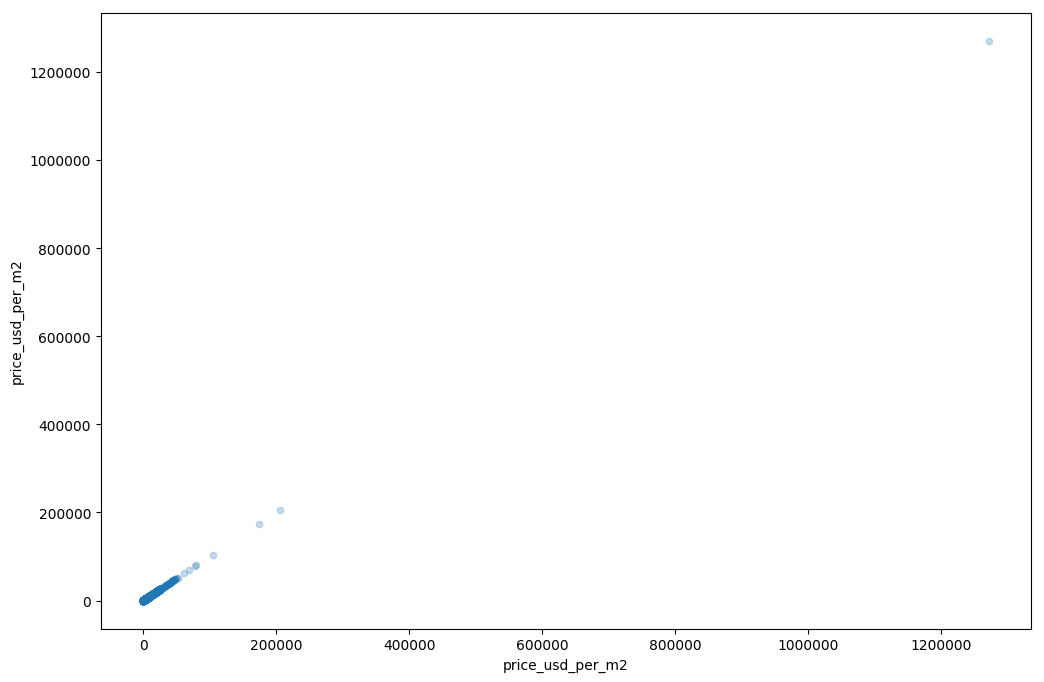

In [7]:
plot =dataCapGba.plot.scatter('price_usd_per_m2','price_usd_per_m2',alpha=0.25,figsize=(12,8))

In [8]:
dataCapGbamayoresA1000.isnull().sum()

created_on                   0
operation                    0
property_type                0
state_name                   0
place_name                  26
lat                      23833
lon                      23833
price                        0
surface_total_in_m2          0
surface_covered_in_m2     4859
price_usd_per_m2             0
price_per_m2              4861
floor                    63597
rooms                    39270
expenses                 58139
description                  1
dtype: int64

In [9]:
dataCapGba.isnull().sum()

created_on                    0
operation                     0
property_type                 0
state_name                    0
place_name                   35
lat                       53082
lon                       53082
price                     18675
surface_total_in_m2       44602
surface_covered_in_m2     22750
price_usd_per_m2          57398
price_per_m2              35587
floor                    139203
rooms                     82581
expenses                 134481
description                   7
dtype: int64

In [10]:
dataCapGbaSupmayor5 = dataCapGbamayoresA1000.loc[dataCapGbamayoresA1000['surface_total_in_m2'] > 5, :]
dataCapGbaSupmayor5.describe()

,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,46152.000000,46152.000000,6.998500e+04,69985.000000,65126.000000,69985.000000,65124.000000,6388.000000,30715.000000,1.184600e+04
mean,-35.103984,-58.355734,3.790876e+05,124.536972,110.365123,2252.221703,4850.923013,4.231684,2.694775,4.944742e+03
std,1.219747,0.526647,8.562354e+05,170.402828,258.007790,1040.848913,13336.864387,5.178648,1.331755,1.302646e+05
min,-38.989067,-65.691686,1.800000e+04,10.000000,0.000000,1001.494214,1.510204,1.000000,1.000000,1.000000e+00
25%,-34.652716,-58.529463,1.000000e+05,47.000000,43.000000,1564.090909,1780.000000,2.000000,2.000000,1.000000e+03
50%,-34.605591,-58.440737,1.680000e+05,72.000000,65.000000,2030.303030,2354.099640,3.000000,3.000000,1.985000e+03
75%,-34.567084,-58.382176,3.390000e+05,140.000000,125.000000,2637.735849,3189.807692,6.000000,3.000000,4.000000e+03
max,-27.359704,-56.160010,5.000000e+07,7832.000000,49000.000000,9966.666667,692046.000000,250.000000,32.000000,1.000150e+07


In [11]:
 
dataPorBarrio = dataCapGbaSupmayor5.loc[:, ['place_name', 'price_usd_per_m2']].groupby('place_name').\
  agg([np.mean,np.size])
dataPorBarrio.sort_values(('price_usd_per_m2','mean'), ascending = False).head(10)

price_usd_per_m2       
                                 mean   size
place_name                                  
Puerto Madero             5816.895059  890.0
Las Gaviotas              5008.445946    2.0
Guillermo Hudson          4722.222222    1.0
Veinte de Junio           4600.000000    1.0
Palermo Chico             4558.563267  245.0
Sierra de la Ventana      4166.666667    1.0
Cruce Castelar            3761.904762    1.0
San Isidro Chico          3697.474747    3.0
Las Cañitas               3577.809885  190.0
Palermo Viejo             3502.013294   60.0

In [12]:
top10 = dataPorBarrio.loc[dataPorBarrio[('price_usd_per_m2','size')] > 30,:].sort_values(('price_usd_per_m2','mean'), ascending=False).head(10) 
top10

price_usd_per_m2        
                              mean    size
place_name                                
Puerto Madero          5816.895059   890.0
Palermo Chico          4558.563267   245.0
Las Cañitas            3577.809885   190.0
Palermo Viejo          3502.013294    60.0
Recoleta               3354.872862  1554.0
Palermo                3305.286963  2533.0
Palermo Soho           3251.810126   402.0
Palermo Hollywood      3209.665198   569.0
Belgrano               3159.374140  2666.0
Nuñez                  3138.142988   693.0

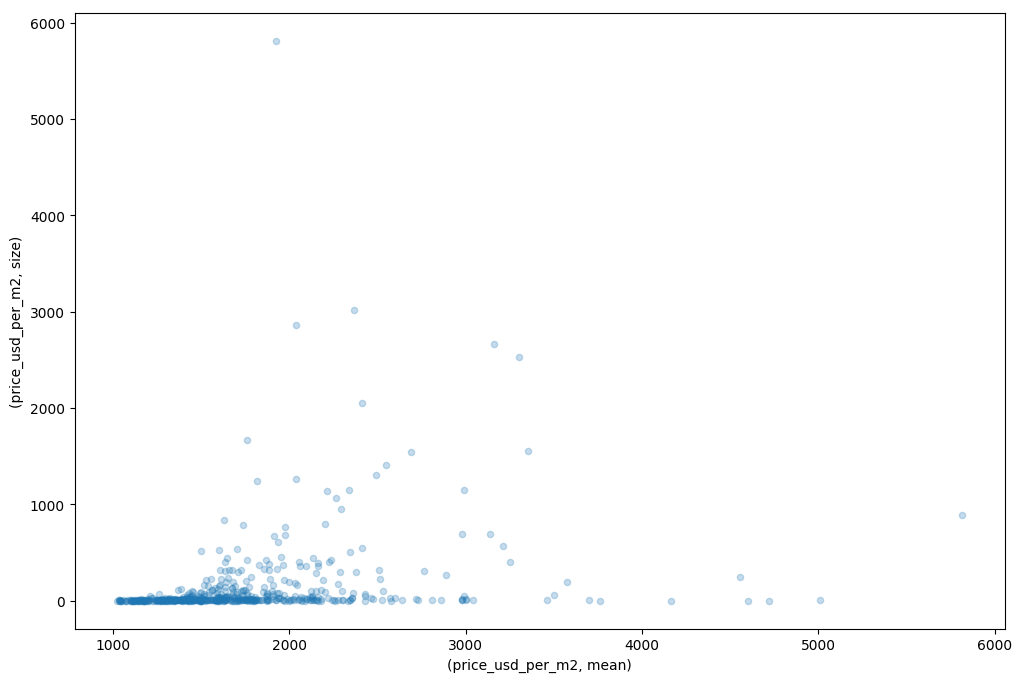

In [13]:
dataPorBarrio.plot.scatter(('price_usd_per_m2','mean'),('price_usd_per_m2','size'),alpha=0.25, figsize=(12,8))

In [25]:
#Funcion para calcular distancias entre coordenadas (lat, lon)
from math import sin,cos,sqrt,asin,pi

#Formula del Harvesine sacada de
#https://joseguerreroa.wordpress.com/2012/11/13/distancia-entre-dos-puntos-de-la-superficie-terrestre-mediante-la-formula-de-haversine-con-python/
#coord = (lat, long)
def distancia(coord1, coord2):
    rTierra = 6374000 #metros
    c = pi/180 #para pasar a raddianes
    d = 2*rTierra*asin(sqrt(sin(c*(coord2['lat']-coord1['lat'])/2)**2 + cos(c*coord1['lat'])*cos(c*coord2['lat'])*sin(c*(coord2['lon']-coord1['lon'])/2)**2))
    return d

Cordoba = (-34.598691, -58.403841)
SantaFe = (-34.594848, -58.402517)
LasHeras = (-34.587879, -58.397970)
EstacionesNuevasSubteH = (Cordoba, SantaFe, LasHeras)

